# <div align=center> **Tugas Submission Dicoding** </div>

---

Nama : Bobby Rachman Hanafi \\
Email : bobbyrachman97@outlook.com \\
Asal Kota : Tuban, Jawa Timur

In [ ]:
import tensorflow as tf
import zipfile,os,shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

<h2><b>A. Manajemen Dataset</b></h2> 

<p><i>Catatan : Dataset yang digunakan merupakan dataset yang diunduh dari link <a href='https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip'>berikut</a>. Dataset tersebut kemuduan dirapihkan sedikit lalu diupload secara manual ke Google Colab</i></p>

<h4>Melakukan ekstraksi dataset yang masih berbentuk .zip</h4>

In [ ]:
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

<h4>Melakukan inisialisasi direktori</h4>

In [ ]:
base_dir = '/content/rockpaperscissors/image'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
rock_dir=os.path.join(base_dir,'rock')
paper_dir=os.path.join(base_dir,'paper')
scissor_dir=os.path.join(base_dir,'scissors')

<h4>Membuat direktori <i>train_dir</i> dan <i>val_dir</i></h4>

In [ ]:
os.mkdir(train_dir)
os.mkdir(val_dir)

<h4>Melakukan inisialisasi untuk direktori <i>train</i> dan <i>val</i> masing masing kelas</h4>

In [ ]:
train_rock=os.path.join(train_dir,'rock')
train_paper=os.path.join(train_dir,'paper')
train_scissor=os.path.join(train_dir,'scissor')

val_rock=os.path.join(val_dir,'rock')
val_paper=os.path.join(val_dir,'paper')
val_scissor=os.path.join(val_dir,'scissor')

<h4>Membuat direktori <i>train</i> dan <i>val</i> untuk masing masing kelas</h4>

In [ ]:
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissor)

os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissor)

<h4>Melakukan pembagian dataset dengan perbandingan data train 60% dan data validation 40%</h4>

In [ ]:
rock_train,rock_val=train_test_split(os.listdir(rock_dir),test_size=0.40)
paper_train,paper_val=train_test_split(os.listdir(paper_dir),test_size=0.40)
scissor_train,scissor_val=train_test_split(os.listdir(scissor_dir),test_size=0.40)

<h4>Memasukkan file dari directory <i>rock,paper</i> dan <i>scissors</i> ke dalam folder <i>train</i> dan <i>val</i></h4>

In [ ]:
for file in rock_train:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in paper_train:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in scissor_train:
  shutil.copy(os.path.join(scissor_dir,file), os.path.join(train_scissor,file))
for file in rock_val:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in paper_val:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in scissor_val:
  shutil.copy(os.path.join(scissor_dir,file), os.path.join(val_scissor,file))

<h4>Melakukan transformasi gambar dengan ImageDataGenerator </h4>

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,
                                 horizontal_flip=True,
                                 shear_range=0.2,
                                 fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=20,
                                horizontal_flip=True,
                                shear_range=0.2,
                                fill_mode='nearest')

<h4>Mendefinisikan sumber data (flow data)</h4>

In [ ]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='categorical')
val_generator=train_datagen.flow_from_directory(val_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


<h4>Membuat model CNN</h4>

In [ ]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150, 150, 3)),
                                  tf.keras.layers.MaxPooling2D(2, 2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(3,activation='softmax')
])

<h4>Melakukan compile terhadap model agar model bisa digunakan</h4>

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adamax(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 256)      

<h4>Membuat callback untuk memberhentikan training ketika akurasi telah mencapai 96%</h4>

In [ ]:
class callbackTrain(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.96):
      print('\nAkurasi model telah mencapai lebih dari 96%')
      self.model.stop_training = True

callbacks=callbackTrain()

In [ ]:
model.fit(train_generator,
          steps_per_epoch=40,
          epochs=20,
          validation_data=val_generator,
          validation_steps=27,
          verbose=1,
          callbacks=[callbacks])

Epoch 1/20
40/40 [==============================] - 15s 363ms/step - loss: 0.8633 - accuracy: 0.6070 - val_loss: 0.3951 - val_accuracy: 0.8704
Epoch 2/20
40/40 [==============================] - 14s 359ms/step - loss: 0.3020 - accuracy: 0.8938 - val_loss: 0.3561 - val_accuracy: 0.8704
Epoch 3/20
40/40 [==============================] - 14s 355ms/step - loss: 0.2306 - accuracy: 0.9148 - val_loss: 0.2442 - val_accuracy: 0.9201
Epoch 4/20
40/40 [==============================] - 14s 356ms/step - loss: 0.1784 - accuracy: 0.9367 - val_loss: 0.3017 - val_accuracy: 0.9074
Epoch 5/20
40/40 [==============================] - 14s 353ms/step - loss: 0.1502 - accuracy: 0.9523 - val_loss: 0.1800 - val_accuracy: 0.9572
Epoch 6/20
40/40 [==============================] - 14s 358ms/step - loss: 0.1571 - accuracy: 0.9398 - val_loss: 0.1736 - val_accuracy: 0.9479
Epoch 7/20
40/40 [==============================] - 14s 358ms/step - loss: 0.1229 - accuracy: 0.9578 - val_loss: 0.1830 - val_accuracy: 0.9479

Saving tangan.jpg to tangan.jpg
tangan.jpg
scissor


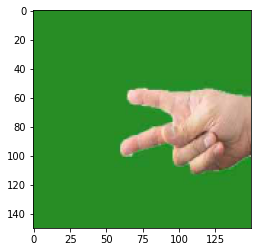

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
      print('paper')
  elif classes[0,1]!=0:
      print('rock')
  else :
     print('scissor')

Saving batu.jpg to batu.jpg
batu.jpg
rock


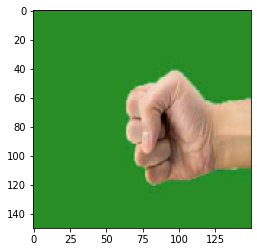

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
      print('paper')
  elif classes[0,1]!=0:
      print('rock')
  else :
     print('scissor')

Saving kertas.jpg to kertas.jpg
kertas.jpg
paper


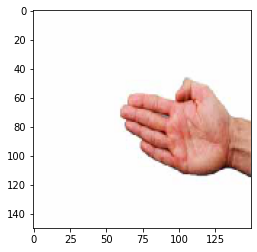

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
      print('paper')
  elif classes[0,1]!=0:
      print('rock')
  else :
     print('scissor')